## Transformation

Some machine learning models like linear and logistic regression assume that the variables are normally distributed. Others benefit from "Gaussian-like" distributions, as in such distributions the observations of X available to predict Y vary across a greater range of values. Thus, Gaussian distributed variables may boost the machine learning algorithm performance.


- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab 
import scipy.stats as stats

In [2]:
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\\titanic\\train.csv', usecols = ['Age', 'Fare', 'Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
def impute_na(data, variable):
    df = data.copy()
    df[variable+'_random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    return df[variable+'_random']

In [4]:
data['Age'] = impute_na(data, 'Age')

#### Orginal Transformation

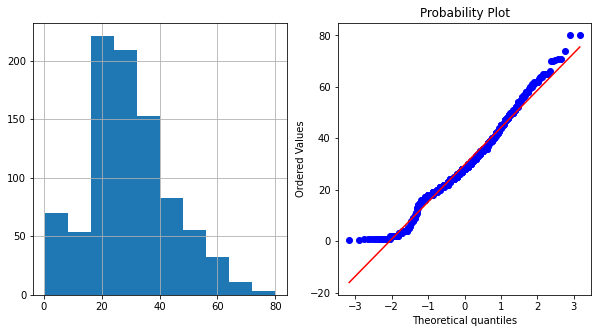

In [5]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
       
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
diagnostic_plots(data, 'Age')

#### Logarithmic transformation

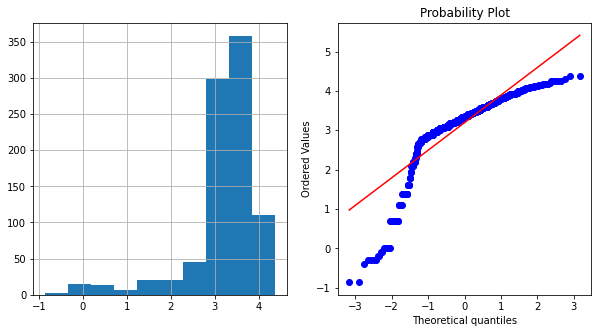

In [6]:
data['Age_log'] = np.log(data.Age)
diagnostic_plots(data, 'Age_log')

### Reciprocal transformation

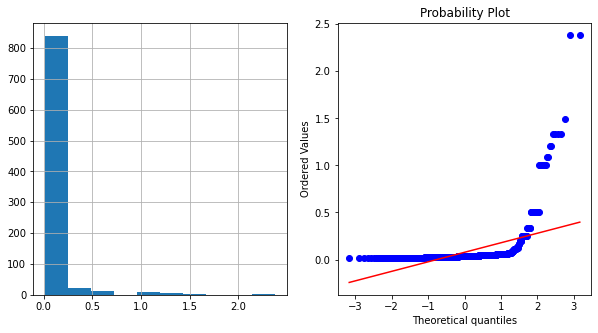

In [8]:
data['Age_reciprocal'] = 1 / data.Age
diagnostic_plots(data, 'Age_reciprocal')

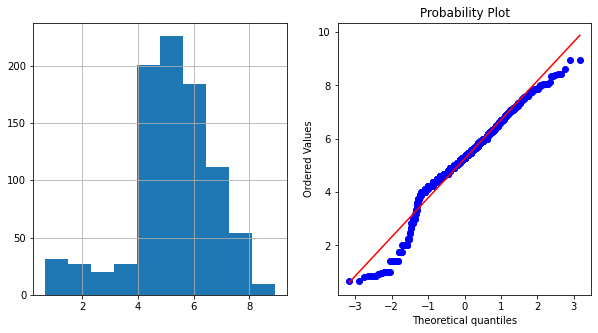

In [9]:
data['Age_sqr'] =data.Age**(1/2)
diagnostic_plots(data, 'Age_sqr')

#### Exponential

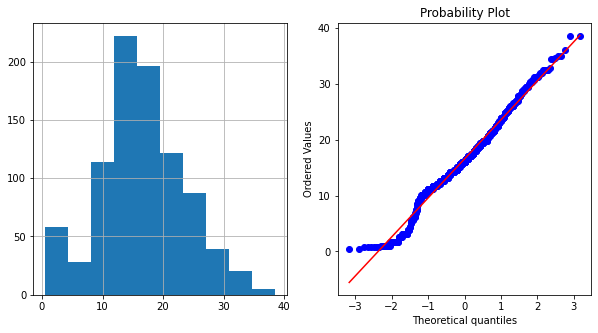

In [10]:
data['Age_exp'] = data.Age**(1/1.2) # you can vary the exponent as needed
diagnostic_plots(data, 'Age_exp')

#### BoxCox transformation

Optimal λ:  0.7648522500282625


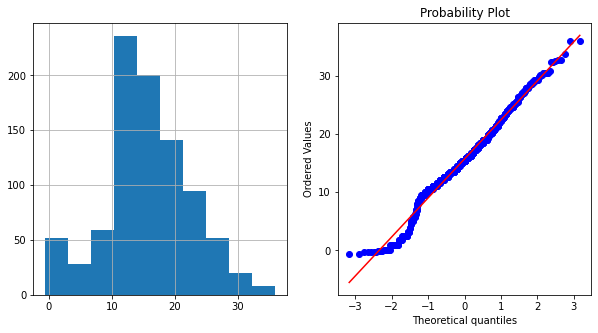

In [11]:
data['Age_boxcox'], param = stats.boxcox(data.Age) 
print('Optimal λ: ', param)
diagnostic_plots(data, 'Age_boxcox')